## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [2]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

--2023-02-25 22:19:00--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab02_deep_learning/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119748 (117K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>] 116.94K  --.-KB/s    in 0.02s   

2023-02-25 22:19:00 (5.25 MB/s) - ‘sonnets.txt’ saved [119748/119748]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [3]:
# Join all the strings into one and lowercase it
# Put result into variable text.

text_ = ''.join(text).lower()
MAX_LENGTH = max(map(len, text))
print("max length =", MAX_LENGTH)

assert len(text_) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text_) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

max length = 63
OK!


### Data loading: "Евгений Онегин"


In [ ]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

--2023-02-23 23:28:42--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.1’

onegin.txt.1        100%[===================>] 256.37K  --.-KB/s    in 0.03s   

2023-02-23 23:28:42 (7.93 MB/s) - ‘onegin.txt.1’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

text_ = ''.join(text).lower()

max length = 63


### Dictionary generation

Put all the characters, that you've seen in the text, into variable `tokens`.

In [61]:
out = [char for char in text_]
tokens = sorted(set(out))
tokens.append('_')
num_tokens = len(tokens)

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [62]:
# dict <index>:<char>
token_to_idx = {token: idx for idx, token in enumerate(tokens)}
print(token_to_idx)
# dict <char>:<index>
idx_to_token = dict((v,k) for k,v in token_to_idx.items())
print(idx_to_token)

for i in range(num_tokens):
    assert token_to_idx[tokens[i]] == i, "token identifier must be it's position in tokens list"

{'\n': 0, ' ': 1, '!': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37, '_': 38}
{0: '\n', 1: ' ', 2: '!', 3: "'", 4: '(', 5: ')', 6: ',', 7: '-', 8: '.', 9: ':', 10: ';', 11: '?', 12: 'a', 13: 'b', 14: 'c', 15: 'd', 16: 'e', 17: 'f', 18: 'g', 19: 'h', 20: 'i', 21: 'j', 22: 'k', 23: 'l', 24: 'm', 25: 'n', 26: 'o', 27: 'p', 28: 'q', 29: 'r', 30: 's', 31: 't', 32: 'u', 33: 'v', 34: 'w', 35: 'x', 36: 'y', 37: 'z', 38: '_'}


### Data preprocessing (Shakespeare)

In [63]:
import re
sonnets_ = re.split('\n\n', text_)
sonnets_ = sonnets_[0::2]
print(len(sonnets_))

154


In [64]:
sonnets = [sonnet + '\n' for sonnet in sonnets_]
print(sonnets[1:2])
print(max(map(len,sonnets)))

["  when forty winters shall besiege thy brow,\n  and dig deep trenches in thy beauty's field,\n  thy youth's proud livery so gazed on now,\n  will be a tatter'd weed of small worth held:\n  then being asked, where all thy beauty lies,\n  where all the treasure of thy lusty days;\n  to say, within thine own deep sunken eyes,\n  were an all-eating shame, and thriftless praise.\n  how much more praise deserv'd thy beauty's use,\n  if thou couldst answer 'this fair child of mine\n  shall sum my count, and make my old excuse,'\n  proving his beauty by succession thine!\n    this were to be new made when thou art old,\n    and see thy blood warm when thou feel'st it cold.\n"]
709


*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def to_matrix(
    text, max_len=None, pad=token_to_idx['_'], dtype='int32', batch_first=True
    ):
    """Casts a list of texts into rnn-digestable matrix"""
    
    max_len = max_len or max(map(len, text))
    text_ix = np.zeros([len(text), max_len], dtype) + pad

    for i in range(len(text)):
        line_ix = [token_to_idx[c] for c in text[i]][:max_len]
        text_ix[i, :len(line_ix)] = line_ix

        
    if not batch_first: # convert [batch, time] into [time, batch]
        text_ix = np.transpose(text_ix)

    return text_ix

In [66]:
print(to_matrix(sonnets[:2]))

[[ 1  1 17 ... 38 38 38]
 [ 1  1 34 ... 15  8  0]]


In [90]:
NUM_UNITS = 256
NUM_TOKENS = len(tokens) #39
MAX_LEN = max(map(len,sonnets)) #709
BATCH_LEN = 32

In [91]:
import torch, torch.nn as nn
import torch.nn.functional as F

class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=NUM_TOKENS, embedding_size=MAX_LEN, rnn_num_units=NUM_UNITS):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        x_emb = self.embedding(x)
        
        # compute next hidden state using self.rnn_update
        x_and_h = torch.cat([x_emb, h_prev], dim=-1)
        h_next = self.rnn_update(x_and_h)
        h_next = torch.tanh(h_next)
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)
        
        return h_next, logits
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [92]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logits = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, logits_next = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logits.append(logits_next)
        
    return torch.stack(logits, dim=1)

In [93]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
opt = torch.optim.Adam(char_rnn.parameters())
loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx['_'])

history = []

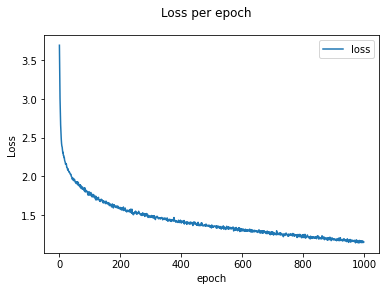

In [94]:
for i in range(1000):
    batch_ix = to_matrix(sample(sonnets, BATCH_LEN), max_len=MAX_LEN)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logits_seq = rnn_loop(char_rnn, batch_ix)
    
    predictions_logits = logits_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = loss_func(
    predictions_logits.reshape((-1, num_tokens)),
    actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.ylabel('Loss')
        plt.xlabel('epoch')
        plt.suptitle('Loss per epoch')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [95]:
def generate_sample(char_rnn, seed_phrase='a', max_length=MAX_LEN, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logits_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logits_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens, p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [98]:
def print_poem(model, temperature=1.0, seed='away'):
    for i in range(4):
        poem = generate_sample(model, seed_phrase=seed, temperature=temperature)
        print(poem)
        print('\n')

In [99]:
print_poem(char_rnn, 1.0)

away;
  these doth the frister'd new large we thixh all here of my best canst before
  my soble despectime;
  with my dearest-in of your silen thee his fige.
  no, no hold depent,
  and all thy bath thee, kilive there;
  save seen
  passivion doth disgrabson thy lacklawe to the growing than every chilate.'
    thou that were base mortard best of my love be fresh?
    me, yet, but the priity,
  and in dupit eat'st by yourself with sickly not thy looks.
    yet then lose, and i lo, of the world-time's might that it with blend;
    'tis myself eyes back she that best want no pent,
  the daises love debady them nightly chesting,
  or wonceat is trifles blood i his lett
  fell mine own larse, nor charge d


away, being your fairs of their part,
  and true,'s usest can all to grow.
    that they see anst yet alone.
    when thy compicic refeasing your well;
    then to live.
    but love thy presers that it win of memory advance thou art mine eye i am shadows live?
    and did needs never lo

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

In [73]:
class CharLSTMLoop(nn.Module):
    def __init__(self, num_tokens=NUM_TOKENS, emb_size=MAX_LEN, lstm_num_units=NUM_UNITS, num_layers=1):
        super(self.__class__, self).__init__()
        self.num_units = lstm_num_units
        self.num_layers = num_layers

        self.emb = nn.Embedding(num_tokens, emb_size)
        self.lstm = nn.LSTM(emb_size, lstm_num_units, num_layers=num_layers, batch_first=True)
        self.hid_to_logits = nn.Linear(lstm_num_units, num_tokens)
    
    def forward(self, x, state):
        input = self.emb(x)
        output, state = self.lstm(input, state)
        next_logits = self.hid_to_logits(output)

        return state, next_logits

    def initial_state(self, batch_size):
        return (torch.zeros(self.num_layers, batch_size, self.num_units, requires_grad=True),
                torch.zeros(self.num_layers, batch_size, self.num_units, requires_grad=True))

model_lstm = CharLSTMLoop(emb_size=64)
opt = torch.optim.Adam(model_lstm.parameters())
loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx['_'])
history = []

Plot the loss function of the number of epochs. Does the final loss become better?

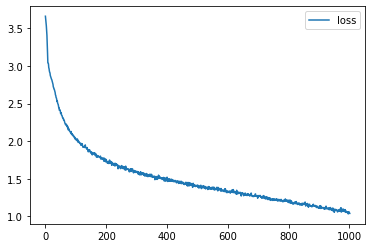

In [83]:
for i in range(1000):
    batch_ix = to_matrix(sample(sonnets, BATCH_LEN))
    batch_ix = torch.LongTensor(batch_ix)
    state = model_lstm.initial_state(BATCH_LEN)

    state, logits_seq = model_lstm(batch_ix, state)
    
    #compute loss
    predictions_logits = logits_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]
    loss = loss_func(predictions_logits.contiguous().view(-1, NUM_TOKENS), 
                     actual_next_tokens.contiguous().view(-1))
    
    # train with backprop
    loss.backward()

    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
      clear_output(True)
      plt.plot(history,label='loss')
      plt.legend()
      plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "LSTM didn't converge."

In [75]:
def generate_sample_lstm(rnn, seed_phrase='a', max_length=MAX_LEN, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The LSTM is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase.lower()]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    state = rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    state, logits_next = rnn(x_sequence, state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        state, logits_next = rnn(x_sequence[:, None, -1], state)
        p_next = F.softmax(logits_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens, p=p_next[0])
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [84]:
temp = [0.1, 0.2, 0.5, 1.0, 2.0]

for t in temp:
  poem = generate_sample_lstm(model_lstm, seed_phrase = 'away', temperature=t)
  print('Temperature=%s:' % t)
  print(poem)
  print('\n')

Temperature=0.1:
away;
      o! love i see the painted on such a prove the stary steal,
  which i say mind of thine eyes are seen,
  which i say seem but will be all the self,
    and there and the true in my self doth live,
  and such a compored of thee thine own state,
  and such my love shall thee that love to me,
    and therefore mayst thy sweet self i love thee,
  where thou art thou art to thee i am now,
  when i have seen the world with me thou hast,
  and say the stars and self i love thee tend,
  when i self the present of thy shadows spend,
  the wide thoughts in thee i am not so sore,
    and the true thee art to the see the starte,
  and therefore mayst thou this poor dear live,
  and that which i think 


Temperature=0.2:
away,
      o! i how i have seen the take that thou dost be as thee,
  when thou art thou art which that thou mayst call,
    and that heaven that all the world in heart,
  that i shall be the self in the state,
  and me thou wilt, for thy self doth show

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [85]:
path = './model.pth'
torch.save(model_lstm.state_dict(), path)
print('Saving model to path %s' % path)

Saving model to path ./model.pth


In [86]:
archieved_model = CharLSTMLoop(emb_size=64)
archieved_model.load_state_dict(torch.load(path))
archieved_model.eval()

CharLSTMLoop(
  (emb): Embedding(39, 64)
  (lstm): LSTM(64, 256, batch_first=True)
  (hid_to_logits): Linear(in_features=256, out_features=39, bias=True)
)

In [87]:
print(generate_sample_lstm(archieved_model, seed_phrase = 'away', temperature=1.0))

away..x?.  the drects on eyel knows white thought that love,
  nor have posess from heich from their stains,
  when thy prey of less' in thy true in pory
  as with used from heart's grife in lee.
  thins eye ming one offerides hounds unbainted;
    and therefore than in her pone in thy amase;
  some weceins, and thou myself idferanting,
  when in the present cheke the losion me,
  mure then that were that which excuse gone;
  i say no teem'd the mayst thy did mide,
    the oby night, ginds a diefur sing?
  and one gone, i how my faire to muse,
  and you came no, lich by deep show it thee:
  but this wor, so ill the dost toncee,
    hearts to perfect feeming me, my face so great,
    turn'd muse which


### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)